Адаптируем задачу из раздела УМО II к случаю, когда параметр λ неизвестен и его нужно оценивать (даже вначале, при отсутствии информации) по мере поступления новой информации (с помощью байесовской оценки). В качестве априорного
распределения λ возьмем сопряженное к экспоненциальному распределению. Выберем параметры сопряженного распределения и объясним свой выбор.
Данные те же, что и в задаче из предыдущего раздела.

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
%matplotlib inline

** Имеются серверы, которые периодически выходят из строя. Обозначим $\xi_i$ время между $i$-м и $i+1$-м моментами выхода сервера из строя. Предполагается, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$. **

** Обозначим $N_t$ - количество серверов, которые вышли из строя к моменту времени $t$. В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t-N_s \sim Pois(\lambda(t-s))$ и независима с $N_s$. При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.  **

**Необходимо оценить параметр $\lambda$.**

In [5]:
data = pd.read_csv('6.csv')
data[:10]

,lambda = 88
0,t_0 = 300
1,t = 90000
2,58.3458
3,117.1273
4,303.7976
5,481.9694
6,496.6469
7,653.6537
8,686.9146
9,694.7753


Однако в прошлый раз по результатам опыта, было сделано предположение что $\lambda = 0.0088$, так как значение 88 не согласовывалось с опытом. Условное матожидание. $E(N_t|N_s) = E(N_t - N_s + N_s|N_s) =$ (так как $N_t - N_s$ независима от $N_s$ по условию)$=E(N_t - N_s) + N_s = \lambda(t - s) + N_s$, если мы захотим сдеать прогноз сколько серверов докупить.

In [9]:
t_0 = 300
t = 90000
data_nd = np.array(data[2:])
len(data_nd)

1000

Сопряженным распределением для экспоненциального является гамма-распределение. Апостериорное распределение параметра $\lambda$ это $Г(\alpha + \sum X_i, \beta + n)$, где $Г(\alpha,\beta)$ - априорное распределение параметра $\lambda$. Тогда байесовская оценка для $\lambda$ = $\frac{\beta + n}{\alpha + \sum X_i}$. Где выборка $X_1,...,X_N$ - времена между отключениями серверов.

Теперь нам нужно выбрать априорные параметры. Посмотрим как ведет себя гамма распределение в зависимости от параметров.
Хотим чтобы его матожидание в районе 0.01, при $\alpha = 1$, матожидание $\frac{\beta}{\alpha}$ = 0.01, видно, что $\beta$ должно быть как можно ближе к $\lambda$.

In [42]:
# В stats a=Beta, scale = 1/alpha
def get_gamma(alpha,beta):
    x = np.arange(-5,5,0.005)
    fig = plt.figure(figsize=(10,5))
    plt.plot(x, stats.gamma.pdf(x, a = beta, scale=1./alpha))
    plt.show()

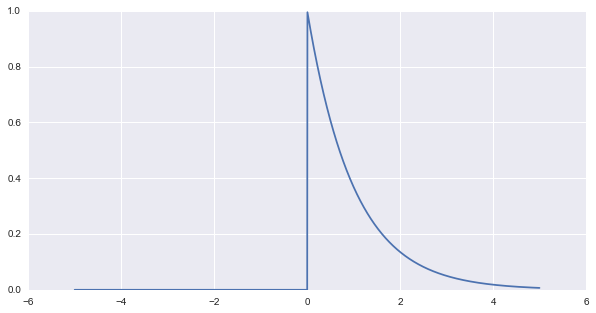

In [43]:
get_gamma(1,1)

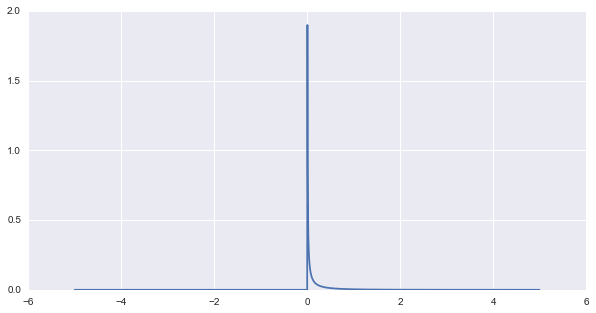

In [50]:
get_gamma(1,0.01)

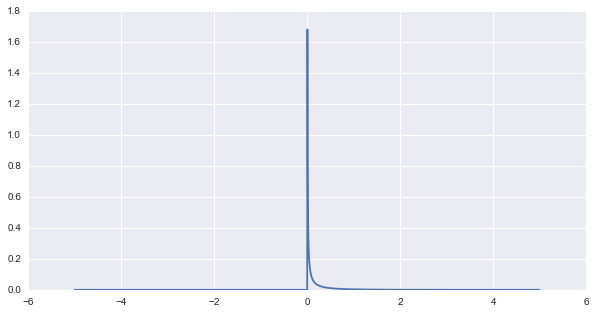

In [51]:
get_gamma(1,0.0088)

In [64]:
data_nd[:10,0]

array(['58.3458', '117.1273', '303.7976', '481.9694', '496.6469',
       '653.6537', '686.9146', '694.7753', '768.4777', '821.0795'], dtype=object)

In [62]:
X = np.zeros(999)
for i in range(999):
    X[i] = float(data_nd[i + 1][0]) - float(data_nd[i][0])

In [63]:
X[:10]

array([  58.7815,  186.6703,  178.1718,   14.6775,  157.0068,   33.2609,
          7.8607,   73.7024,   52.6018,    3.9748])

In [115]:
y_s = np.zeros(999)
y_l = np.zeros(999)
x = np.arange(1,1000,1)
def get_predictions(alpha, beta):
    summ = 0.
    for n in range(999):
        summ += float(data_nd[n][0])
        l_estim = (beta + n + 1) / (alpha + summ)
        s_estim = l_estim * (float(data_nd[-1][0]) - float(data_nd[n][0])) + n
        y_s[n] = s_estim
        y_l[n] = l_estim
        print("lambda estimation: ", l_estim, "server estimation", s_estim)
    print(y_l[-1])

In [116]:
get_predictions(1,0.01)

lambda estimation:  0.01701889602971061 server estimation 1473.2638515783763
lambda estimation:  0.011389837884640775 server estimation 986.3072755451116
lambda estimation:  0.006267298837926195 server estimation 542.9989169961857
lambda estimation:  0.0041673590614234425 server estimation 361.9877060278406
lambda estimation:  0.0034341247814258405 server estimation 299.77449560658226
lambda estimation:  0.0028449156032828147 server estimation 249.5803827135733
lambda estimation:  0.002504058557391504 server estimation 221.19325720078473
lambda estimation:  0.0022923501385397975 server estimation 203.98148418939496
lambda estimation:  0.002113679699828393 server estimation 189.47256284555056
lambda estimation:  0.0019690042924293575 server estimation 177.9477051433972
lambda estimation:  0.0018633092260157027 server estimation 169.87127906125633
lambda estimation:  0.00166896024790994 server estimation 153.4248102059379
lambda estimation:  0.0015299488966493062 server estimation 142.53

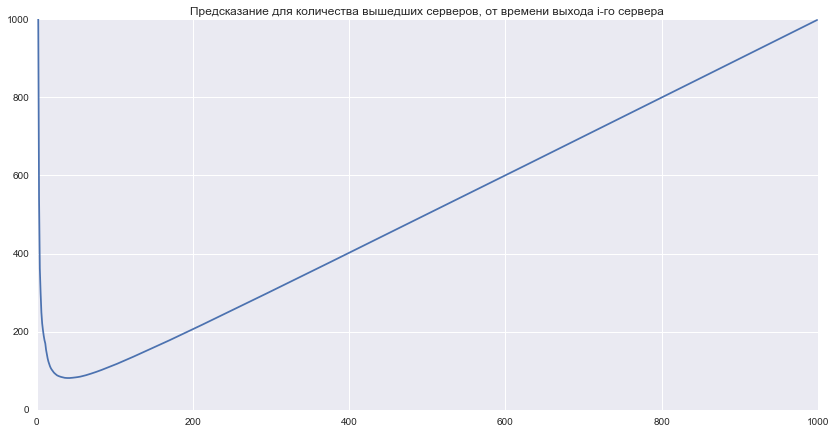

In [117]:
fig = plt.figure(figsize=(14,7))
plt.plot(x,y_s)
plt.title("Предсказание для количества вышедших серверов, от времени выхода i-го сервера")
pylab.ylim(0,1000)
plt.show()

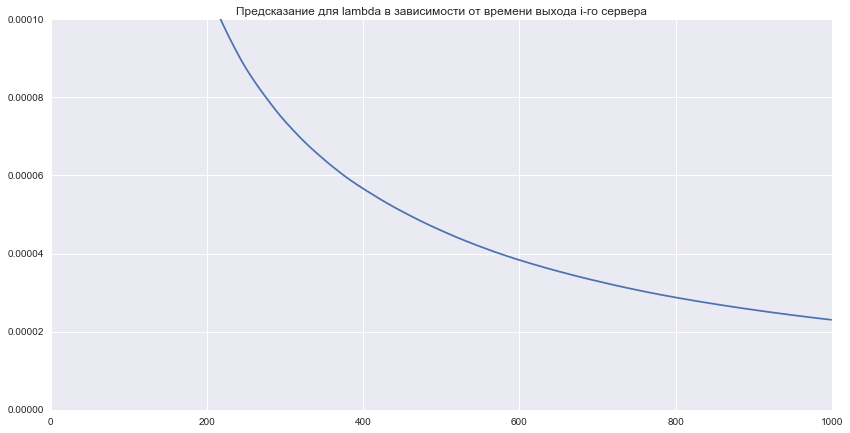

In [118]:
fig = plt.figure(figsize=(14,7))
plt.plot(x,y_l)
plt.title("Предсказание для lambda в зависимости от времени выхода i-го сервера")
pylab.ylim(0,0.0001)
plt.show()

In [119]:
print(y_l[-1])

2.30508866793e-05


In [120]:
#А теперь попробуем для lambda=88
get_predictions(1,88)

lambda estimation:  1.4996848976675687 server estimation 129822.2601885896
lambda estimation:  0.5099927411033184 server estimation 44119.236218437836
lambda estimation:  0.1894764764954431 server estimation 16357.781211512593
lambda estimation:  0.09561023283066254 server estimation 8239.126921336994
lambda estimation:  0.06374722648155752 server estimation 5494.424768744941
lambda estimation:  0.04449618414452323 server estimation 3830.3836896964876
lambda estimation:  0.03393517303169656 server estimation 2922.313756644016
lambda estimation:  0.02747385933830469 server estimation 2367.826776801737
lambda estimation:  0.022755486224567606 server estimation 1961.7001771385576
lambda estimation:  0.019276965100706995 server estimation 1663.033476928364
lambda estimation:  0.01675455162357444 server estimation 1447.5346618587084
lambda estimation:  0.013896421714487427 server estimation 1196.8851807322055
lambda estimation:  0.011877389589667942 server estimation 1025.3462074671856
lamb

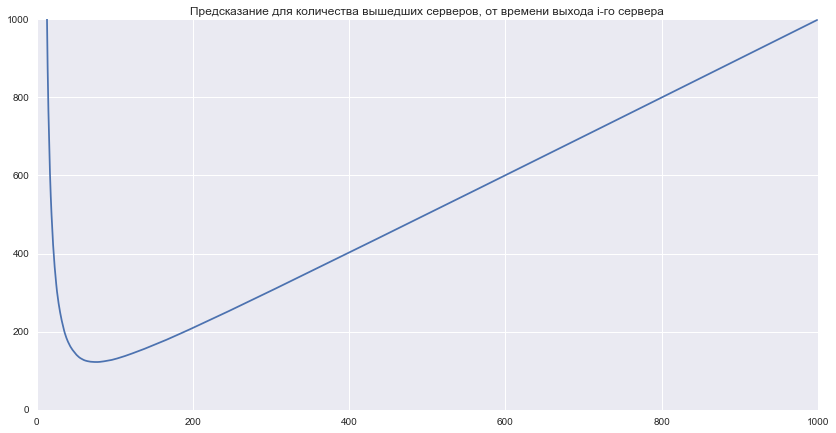

In [121]:
fig = plt.figure(figsize=(14,7))
plt.plot(x,y_s)
plt.title("Предсказание для количества вышедших серверов, от времени выхода i-го сервера")
pylab.ylim(0,1000)
plt.show()

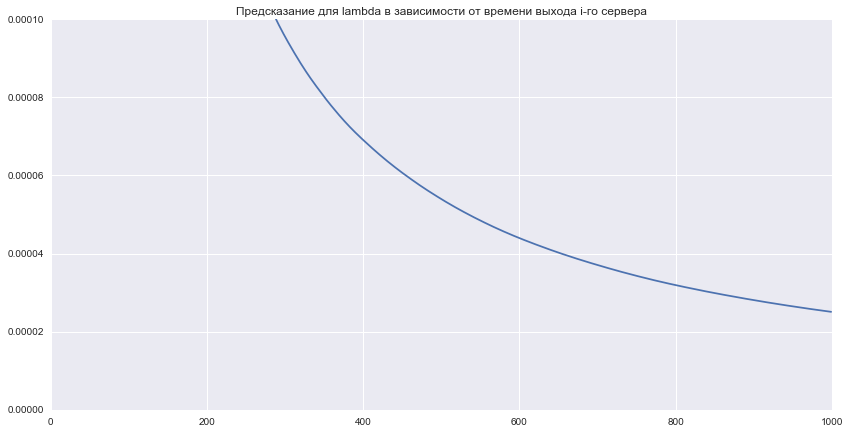

In [122]:
fig = plt.figure(figsize=(14,7))
plt.plot(x,y_l)
plt.title("Предсказание для lambda в зависимости от времени выхода i-го сервера")
pylab.ylim(0,0.0001)
plt.show()

In [123]:
# А теперь lambda = 0.00002
get_predictions(1,0.00002)

lambda estimation:  0.01685072911646654 server estimation 1458.706254312285
lambda estimation:  0.011333285356238431 server estimation 981.4150533511116
lambda estimation:  0.006246518890284167 server estimation 541.2051730787033
lambda estimation:  0.0041569874296446385 server estimation 361.094265303113
lambda estimation:  0.0034272839500249165 server estimation 299.18530808838796
lambda estimation:  0.0028401914339449175 server estimation 249.1742409133268
lambda estimation:  0.0025004935781614375 server estimation 220.8868907661394
lambda estimation:  0.002289494001912753 server estimation 203.73605657238994
lambda estimation:  0.002111338465266319 server estimation 189.2715532809336
lambda estimation:  0.0019670411892486936 server estimation 177.77926377503246
lambda estimation:  0.0018616202318217302 server estimation 169.72636395089927
lambda estimation:  0.001667573385022834 server estimation 153.3064588649008
lambda estimation:  0.0015287752694403468 server estimation 142.4309

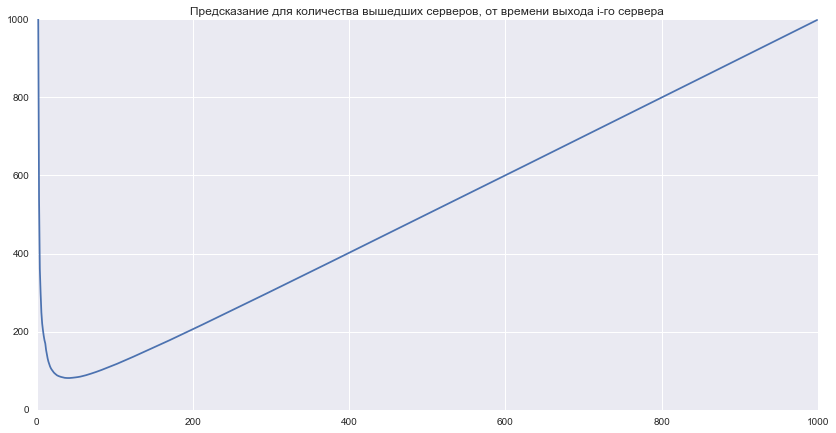

In [124]:
fig = plt.figure(figsize=(14,7))
plt.plot(x,y_s)
plt.title("Предсказание для количества вышедших серверов, от времени выхода i-го сервера")
pylab.ylim(0,1000)
plt.show()

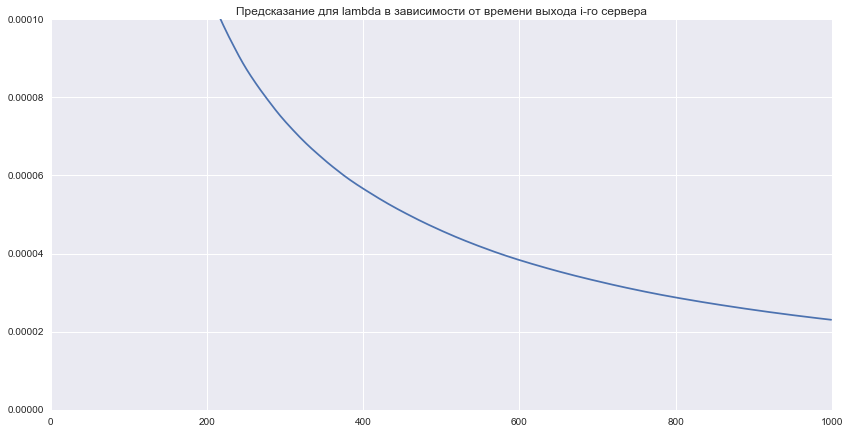

In [125]:
fig = plt.figure(figsize=(14,7))
plt.plot(x,y_l)
plt.title("Предсказание для lambda в зависимости от времени выхода i-го сервера")
pylab.ylim(0,0.0001)
plt.show()

### Вывод. Мы получили, что истинное значение $\lambda$ находится около $2.3 \cdot 10^{-5}$. Все байесовские оценки сошлись к этому значению, даже с неправильными параметрами априорного распределения. Оценка с правильными параметрами сходилась быстрее. Таким образом байесовский подход, хороший метод для решения таких задач.